In [ ]:
url = "https://github.com/ashishjain1547/machine_learning_oct_2023/raw/main/5_time%20series%20analysis%20of%20page%20views%20data%20using%20explonential%20moving%20average%20(2024%20Apr%2016)/data.csv"

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(url)

In [ ]:
df

,Month,Posts Total,Posts Growth,Views,Views Growth
0,2016 10,0,0,2,236
1,2016 11,4,4,218,454
2,2016 12,2,6,191,645
3,2017 01,0,6,3,648
4,2017 02,0,6,16,664
...,...,...,...,...,...
85,2023 11,9,2056,4812,1417148
86,2023 12,27,2083,7431,1424579
87,2024 01,38,2121,6042,1430621
88,2024 02,19,2140,6922,1437543


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

X = df[['Views']]
clf = IsolationForest(random_state=0).fit(X)
anomalyscores_if = clf.decision_function(X)

In [ ]:
import numpy as np

# X = [[-1.1], [0.2], [101.1], [0.3]]

X = df[['Views']]
clf = LocalOutlierFactor().fit(X)

anomalyscores_lof = clf.negative_outlier_factor_

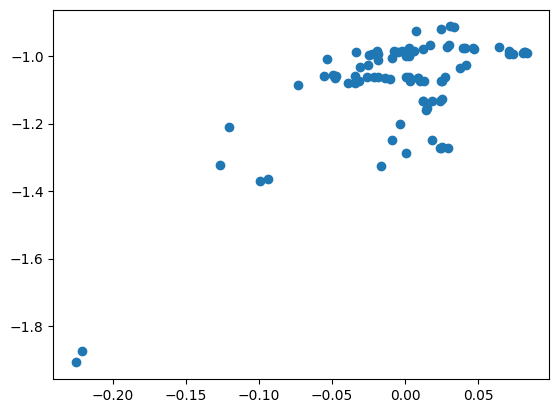

In [ ]:
import matplotlib.pyplot as plt

x = anomalyscores_if
y = anomalyscores_lof

plt.scatter(x, y)
plt.show()

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html
# https://scikit-learn.org/0.15/modules/generated/sklearn.mixture.DPGMM.html

In [ ]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture

# X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [12, 4], [10, 7]])
X = pd.DataFrame({
    "anomalyscores_if": anomalyscores_if,
    "anomalyscores_lof": anomalyscores_lof
})
bgm = BayesianGaussianMixture(n_components=2, random_state=42).fit(X)

# bgm.means_
bgm_preds = bgm.predict(X)

In [ ]:
bgm_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [ ]:
from collections import Counter
c = Counter(bgm_preds)
[(i, c[i] / sum(c.values()) * 100.0) for i in c]

[(0, 81.11111111111111), (1, 18.88888888888889)]

In [ ]:
X = df[['Views']]
clf = IsolationForest(contamination=0.188, random_state=0).fit(X)
preds = clf.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
report = pd.DataFrame({
  "views": df['Views'],
  "pred": preds
})

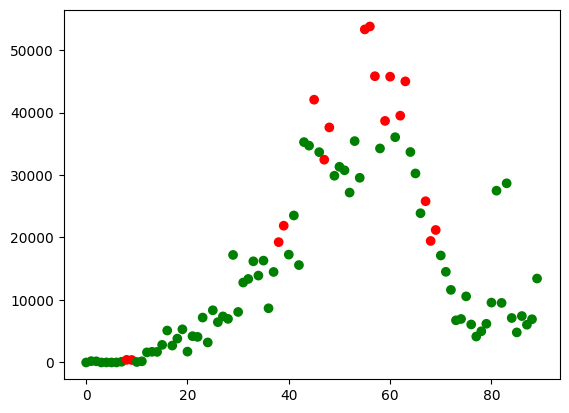

In [ ]:
color= ['red' if l == -1 else 'green' for l in preds]
plt.scatter(report.index, report['views'], color=color)